This notebook predicts the score using [cosine similariy](https://en.wikipedia.org/wiki/Cosine_similarity) between embedding vector of the desired answer and the student's.

note that if the cosine of the answer is below zero the grade will be considered 0.





In [1]:
import numpy as np
import pandas as pd
import util
from tqdm import tqdm
import matplotlib.pyplot as plt


In [2]:
# uncomment the second line to make the model with nomic-embed-text

model, model_name, size_of_embedding = 'mxbai-embed-large', 'xbai', 1024  
#model, model_name, size_of_embedding ='nomic-embed-text', 'nomic', 768


##  cosine similarity as score for mxbai-embed-large model

In [3]:
exams = pd.read_csv('../data/datasets/mohler_dataset.csv')

LIMIT = exams.shape[0]
data = exams.iloc[:,1:7]

data = data.drop(columns=['score_me','score_other'])
data['scaled'] = (data['score_avg'] / 4)  - 0.25

correct_answers = data.iloc[:,1].to_numpy().reshape(-1,1)
student_answers = data.iloc[:,2].to_numpy().reshape(-1,1)



calcualte score

In [6]:

size_of_embedding = 1024 #768 for nomic-embed-text

correct_answers_embedded = np.zeros(shape=(correct_answers.shape[0],size_of_embedding))
student_answers_embedded = np.zeros(shape=(student_answers.shape[0],size_of_embedding))

for i in tqdm(range(correct_answers.shape[0])): 
    correct_answers_embedded[i] = util.get_embedding(input=correct_answers[i,0], model=model).reshape(-1)
    student_answers_embedded[i] = util.get_embedding(input=student_answers[i,0], model=model).reshape(-1)
    dot_score_matrice = np.dot(correct_answers_embedded , student_answers_embedded.T)


dot_score_matrice = np.dot(correct_answers_embedded , student_answers_embedded.T)
dot_scores = np.diag(dot_score_matrice).reshape(-1,1)    

100%|██████████| 2273/2273 [05:45<00:00,  6.57it/s]


In [7]:
score_avg = data['score_avg'].to_numpy().reshape(-1,1)
predicted_scores = (dot_scores * 5 ) 

predicted_scores = np.clip(predicted_scores , 0, 5)
# this way we assume the score for the cosine less than 0 is 0.
util.print_scores(score_avg, predicted_scores)


RMSE:  1.0279288173523558 MAE:  0.8552534127698712 r:  0.5227416368783213


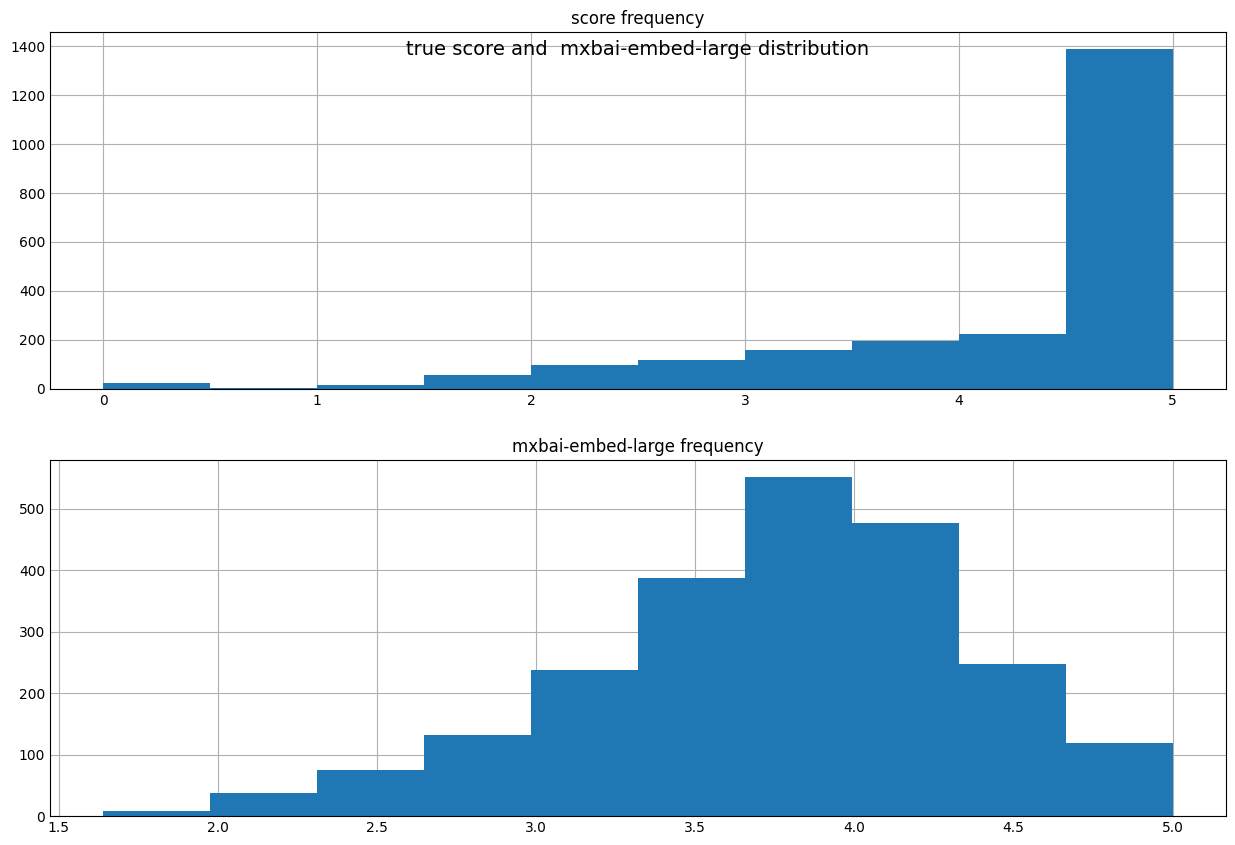

In [15]:

fig , ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))


# plt.style.use('_mpl-gallery')

fig.suptitle(f'true score and  {model} distribution', size =14)

ax[0].set_title('score frequency')
ax[0].hist(score_avg)

ax[1].set_title('mxbai-embed-large frequency')
ax[1].hist(predicted_scores)

plt.show()

## saving data

In [7]:
np.save(f'{model_name}-predicted-scores.npy', predicted_scores)

the Performance :

rmse:  1.0279288173523558    r:  0.5227416368783213